# (Ford GoBike System Data)
## by Mohammed Alsuliman


### The Ford GoBike System Data is a dataset about the bikes and information about who took this bike, and the stations that where was the bike and where he dropped it, etc.

In [39]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
df = pd.read_csv('2017-fordgobike-tripdata.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 59.5+ MB


In [5]:
df.dropna(inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453159 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               453159 non-null int64
start_time                 453159 non-null object
end_time                   453159 non-null object
start_station_id           453159 non-null int64
start_station_name         453159 non-null object
start_station_latitude     453159 non-null float64
start_station_longitude    453159 non-null float64
end_station_id             453159 non-null int64
end_station_name           453159 non-null object
end_station_latitude       453159 non-null float64
end_station_longitude      453159 non-null float64
bike_id                    453159 non-null int64
user_type                  453159 non-null object
member_birth_year          453159 non-null float64
member_gender              453159 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 55.3+ MB


In [7]:
df['start_time'] = df['start_time'].astype('datetime64[ns]')
df['end_time'] = df['end_time'].astype('datetime64[ns]')

In [8]:
df['user_type'] = df['user_type'].astype('category')
df['member_gender'] = df['member_gender'].astype('category')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453159 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               453159 non-null int64
start_time                 453159 non-null datetime64[ns]
end_time                   453159 non-null datetime64[ns]
start_station_id           453159 non-null int64
start_station_name         453159 non-null object
start_station_latitude     453159 non-null float64
start_station_longitude    453159 non-null float64
end_station_id             453159 non-null int64
end_station_name           453159 non-null object
end_station_latitude       453159 non-null float64
end_station_longitude      453159 non-null float64
bike_id                    453159 non-null int64
user_type                  453159 non-null category
member_birth_year          453159 non-null float64
member_gender              453159 non-null category
dtypes: category(2), datetime64[ns](2), float64(5), int64(4), object(2)
memory usage: 49.3+ MB


### What is the structure of your dataset?

- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
- Member Year of Birth
- Member Gender

### What is/are the main feature(s) of interest in your dataset?

- I think the ( User_type, member_birth_year, member_gender)

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- User_type
- member_birth_year
- member_gender
- duration_sec

# Univariate Exploration

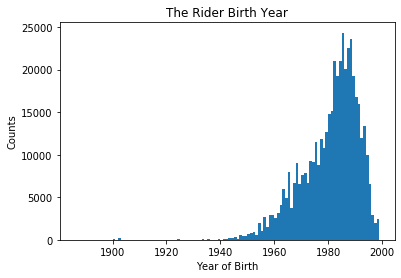

In [24]:
# i added the bin edges so that the visual looks good
bin_edges = np.arange(df['member_birth_year'].min(), df['member_birth_year'].max() + 1, 1)
plt.hist(data = df, x ='member_birth_year',bins = bin_edges);
plt.title('The Rider Birth Year');
plt.xlabel('Year of Birth');
plt.ylabel('Counts');

- as you can see here the most riders aged between 29 and 39 years

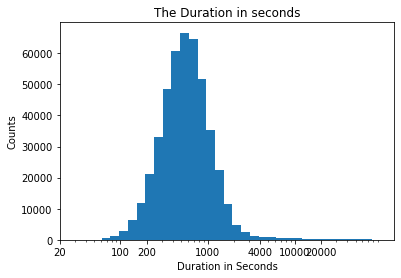

In [21]:
bin_edges = 10 ** np.arange(1.785, 4.936 + 0.1, 0.1)
ticks = [20,100,200,1000,4000,10000,20000]
labls = ['{}'.format(v) for v in ticks]
plt.hist(data = df, x ='duration_sec', bins = bin_edges);
plt.xscale("log");
plt.xticks(ticks,labls);
plt.title('The Duration in seconds');
plt.xlabel('Duration in Seconds');
plt.ylabel('Counts');

- between 200 and 1000 second is the most time spent on cycling

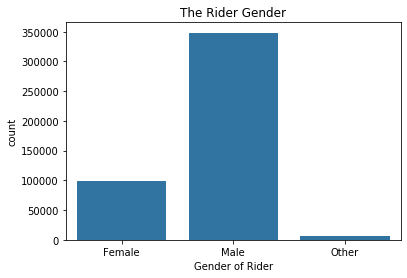

In [34]:
# i used the color_palettle()[0] to moke the color the original 
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'member_gender', color = base_color);
plt.title('The Rider Gender');
plt.xlabel('Gender of Rider');

- as you can see here The Number of Males around 350000 Unlike The females, Other.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- no i guess everything is good!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- Yes in the duration_sec i had to add ticks and bin edges to make the distribution better

# Bivariate Exploration

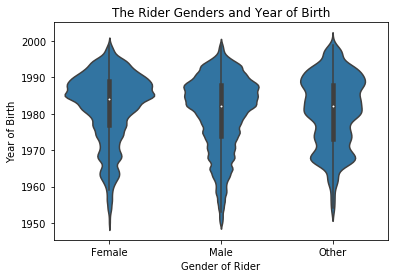

In [35]:
# here i user the "df.query("member_birth_year >= 1950 ")" to Determination of the y axis 
sb.violinplot(data = df.query("member_birth_year >= 1950 ")
              ,x = 'member_gender',y='member_birth_year',color = sb.color_palette()[0]);
plt.title('The Rider Genders and Year of Birth');
plt.xlabel('Gender of Rider');
plt.ylabel('Year of Birth');

- The females are the highest in 1980 and 1990 they are more than the others

In [61]:
q1 = df['duration_sec'].quantile(0.25)
q3 = df['duration_sec'].quantile(0.75)

In [62]:
qr = q3 - q1
qr

474.0

In [63]:
q3

838.0

In [64]:
q1

364.0

- and here i Calculated the first and the third quantile of the Duration to specify the range in the visual

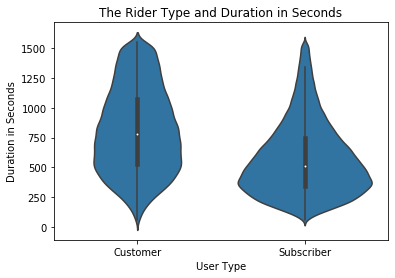

In [36]:
# i used the  first and the third quantile here 
sb.violinplot(data = df.query('duration_sec <= 838 + 1.5*474'),
              x = 'user_type',y='duration_sec',color = sb.color_palette()[0]);
plt.title('The Rider Type and Duration in Seconds');
plt.xlabel('User Type');
plt.ylabel('Duration in Seconds');

- The Coustomers takes more time than the Subscribers

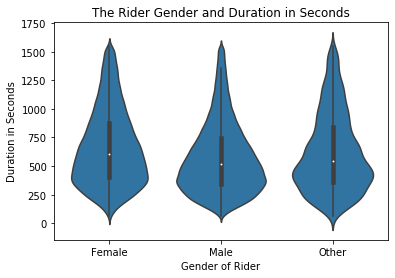

In [37]:
sb.violinplot(data = df.query('duration_sec <= 838 + 1.5*474'),
              x = 'member_gender',y='duration_sec',color = sb.color_palette()[0]);
plt.title('The Rider Gender and Duration in Seconds');
plt.xlabel('Gender of Rider');
plt.ylabel('Duration in Seconds');

- as you can see here the males are more than the others with a very small different in The Durations in Seconds

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- as you can see in the first graph i compared the birth year and the gender and it looks like The females are the highest Between 1980 and 1990 they are more than the others

- and in the second graph i compared the Duration with the User type and we get that The Coustomers takes more time than the Subscribers

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

-  Yes the Coustomers takes more time than the Subscribers 


# Multivariate Exploration

## Duration , Birth Year , User Type

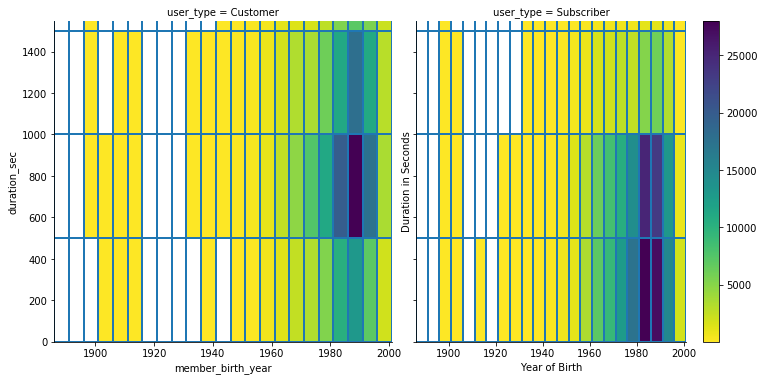

In [38]:
x_bin = np.arange( df['member_birth_year'].min(), df['member_birth_year'].max()+5, 5)
y_bin = np.arange(0, (838 + 1.5*474)+500, 500)
_temp = df.sample(300000, random_state=42)
m = sb.FacetGrid(data = _temp, col = 'user_type',height=5.4)
m.map(plt.hist2d, 'member_birth_year','duration_sec',cmin=0.5,cmap = 'viridis_r',bins=[x_bin, y_bin]);
plt.ylim((0,(838 + 1.5*474)));
plt.colorbar();
plt.xlabel('Year of Birth');
plt.ylabel('Duration in Seconds');

- Customer usually takes from 500 to 1000 Seconds in thier Rides
- Subscriber usually takes from 0 to 500 Seconds in thier Rides
- and they are all between 39 and 20 Years old

## Duration , Birth Year , Member Gender

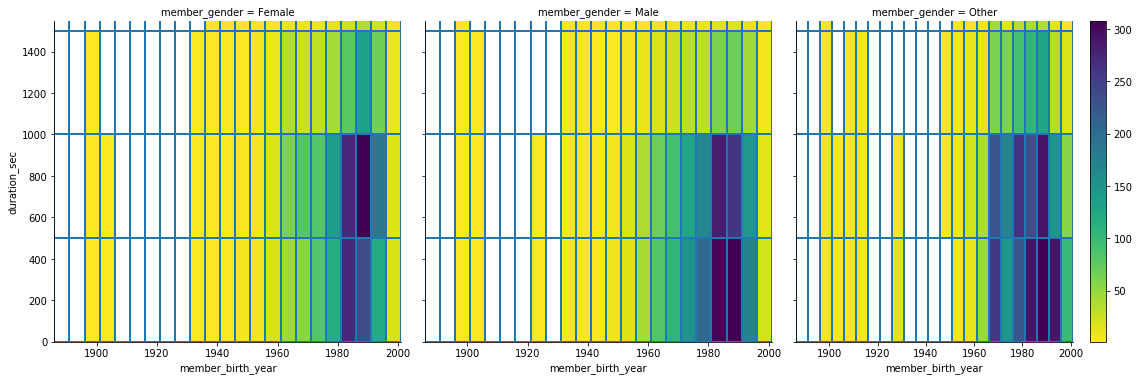

In [86]:
x_bin = np.arange( df['member_birth_year'].min(), df['member_birth_year'].max()+5, 5)
y_bin = np.arange(0, (838 + 1.5*474)+500, 500)
_temp = df.sample(300000, random_state=42)
m = sb.FacetGrid(data = _temp, col = 'member_gender',height=5.4)
m.map(plt.hist2d, 'member_birth_year','duration_sec',cmin=0.5,cmap = 'viridis_r',bins=[x_bin, y_bin]);
plt.ylim((0,(838 + 1.5*474)));
plt.colorbar();

- Females usually takes from 500 to 1000 Seconds in thier Rides
- Males and Other usually takes from 0 to 1000 Seconds in thier Rides
- and they are all between 39 and 20 Years old

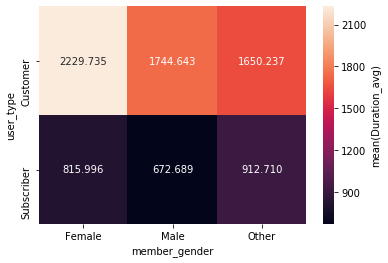

In [19]:

cat_means = df.groupby(['member_gender', 'user_type']).mean()['duration_sec']
cat_means = cat_means.reset_index(name = 'Duration_avg')
cat_means = cat_means.pivot(index = 'user_type', columns = 'member_gender',
                            values = 'Duration_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(Duration_avg)'});

- as you can see the coustomer females are the highest in the average Duration ( top left )
- where the male Subscriber are the lowest in the average Duration ( bottom middle )

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- You Can see that most of the riders are in between 1980 and 2000

### Were there any interesting or surprising interactions between features?

- i dont know for sure but i think the duration and the other gender have some interaction.